# Urban Sound Multiclass Classifier
### ML1020 - Machine Learning at Scale

## Data Analysis

Let's load the train data and explore available classes and sample distirubtion between the classes. note: the test data is not labled thus it is useless for the training purpose. We have no choice but employ the train dataset to train and validate the model.

### Sound Classes

In [4]:
# improt required lbraries
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display
import IPython.display
import soundfile as sf
import glob


# define the path relative to the notebook source
# expected data structure
# -----------------------------------------------
# project root
# src
#   main.ipynb
# data
#   original
#     train
#       samples
#         *.wav
#       train.csv
#     test
#       samples
#         *.wav
#       test.csv
TRAIN_DATA_PATH = "../data/original/train"
TRAIN_FILE = "train.csv"
# Read the train data file 
data = pd.read_csv("{0}/{1}".format(TRAIN_DATA_PATH,TRAIN_FILE),sep = ',')

In [5]:
data.head(10)

,ID,Class
0,0,siren
1,1,street_music
2,2,drilling
3,3,siren
4,4,dog_bark
5,6,children_playing
6,10,street_music
7,11,drilling
8,12,gun_shot
9,15,dog_bark


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5435 entries, 0 to 5434
Data columns (total 2 columns):
ID       5435 non-null int64
Class    5435 non-null object
dtypes: int64(1), object(1)
memory usage: 85.0+ KB


Let's examine what classes are available

In [7]:
classes = data.Class.unique()
classes

array(['siren', 'street_music', 'drilling', 'dog_bark',
       'children_playing', 'gun_shot', 'engine_idling', 'air_conditioner',
       'jackhammer', 'car_horn'], dtype=object)

In [8]:
print("Number of classes: {0}".format(len(classes)))

Number of classes: 10


As per the output above the dataset comprises ten urban sound classes. It is time to take a look at the class population.

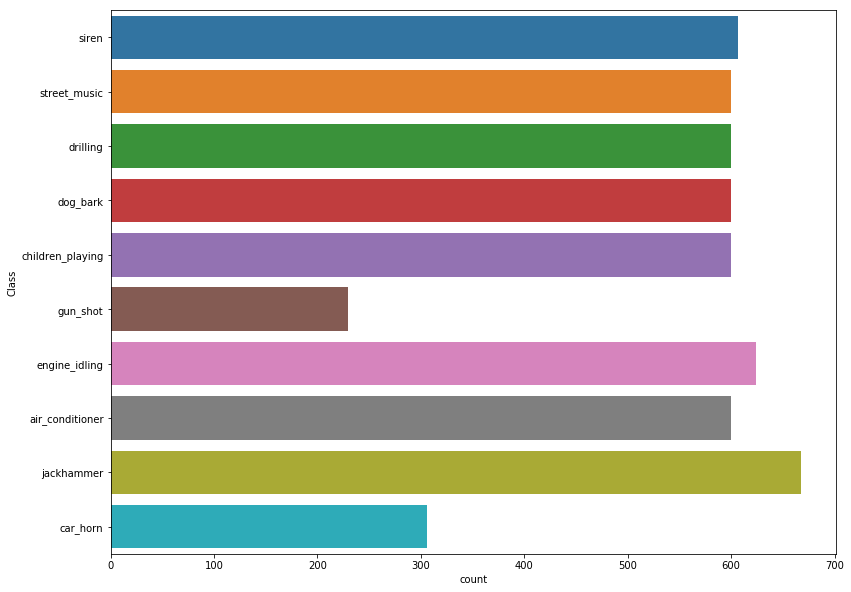

In [9]:
classDistribution = data.groupby(['Class']).count().reset_index().rename(columns={'ID':'Count'})
plt.figure(figsize=(13,10))
p = sns.countplot(data=data,y='Class')


`Gun Shot` and `Car Horn` categories are underpopulated. We could: 

* digitize and upsample these categories
* downsample all categories
* add more labeled observations to the smaller categories
* leave as is hoping that the categories with the smaller population stil have enough to train the network

Let's leave the data intact. If during the training we realize that the scarsly popluated categories are not detected well we will take action

### Basic Data Stats

Le't explore the sound smaples length and sample rate. The number of files is quite large let's take a 10% of samples to calculate the stats

In [65]:
paths = glob.glob("{0}/samples/*".format(TRAIN_DATA_PATH))

In [66]:
import random
samplePaths = random.sample(paths,round(len(paths)*.01))

In [69]:
sampleDf = pd.DataFrame([sf.read(path) for path in samplePaths])
sampleDf.columns = ['Data', 'SampleRate']

In [74]:
sampleDf.shape

(54, 2)

#### Sample Rate Distirbution

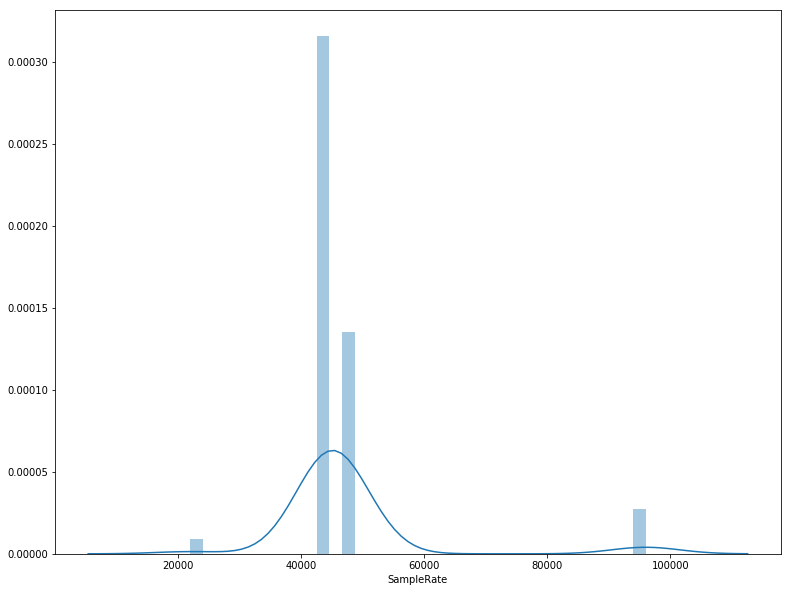

In [79]:
plt.figure(figsize=(13,10))
sns.distplot(sampleDf.SampleRate);

Evidently the sample rate of the sound files varies. We would have to resample the original data to bring it to the same standard. Let's caclulate the length of the sounds

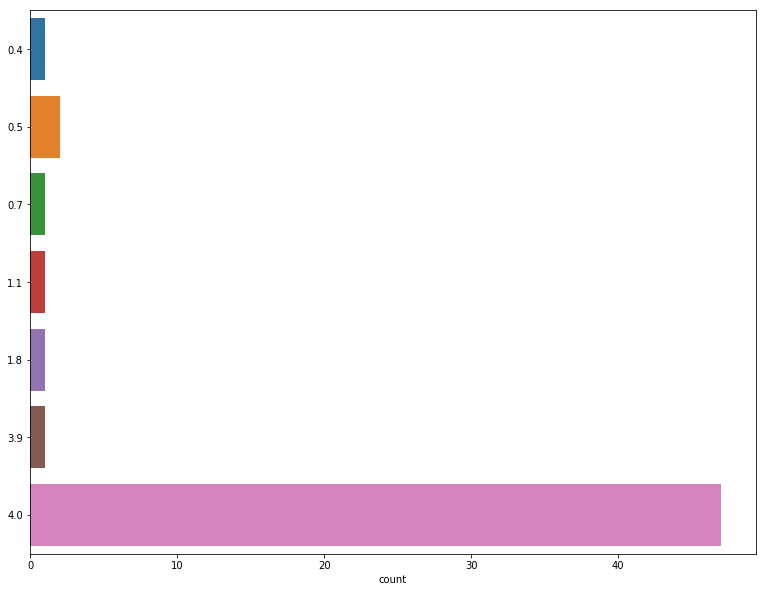

In [123]:
plt.figure(figsize=(13,10))
sns.countplot(y=round(sampleDf.Data.str.len()/sampleDf.SampleRate,1));

Majority of the sound files are 4 second long. But there are some file that are less than s second long. Design the network we would have to make sure that the input layer is able to deal with the sound samples of various length and a sample rate  

#### Sound Characteristics of Each Category 

There are ten sound classess. Let's taka a sample from each class and review its characteristics. WORK in progress!!

In [193]:
siren, r = sf.read("{0}/samples/66.wav".format(TRAIN_DATA_PATH))
#street_music
#drilling
#dog_bark
#children_playing
#gun_shot
#engine_idling
#air_conditioner
#jackhammer
#car_horn

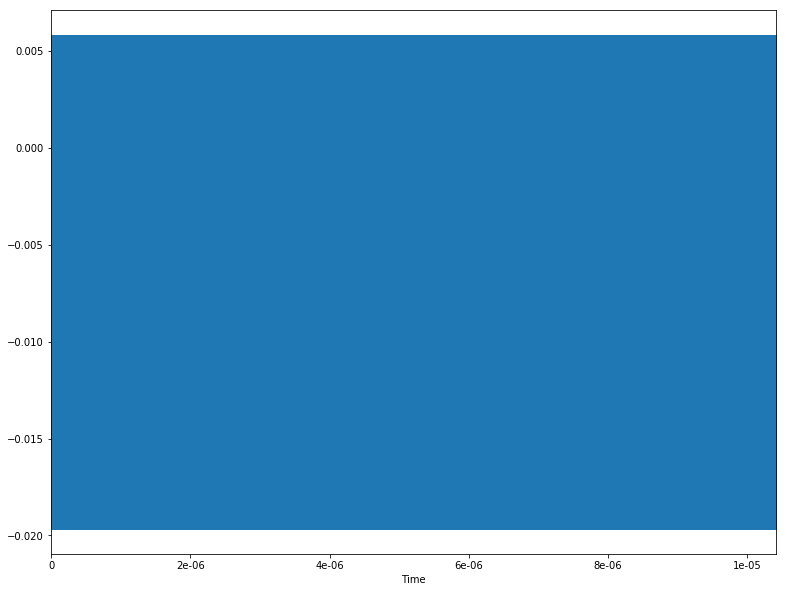

In [189]:
plt.figure(figsize=(13,10))
p=librosa.display.waveplot(siren,sr=r)

In [190]:
from scipy.io import wavfile
rate, data = wavfile.read("{0}/samples/66.wav".format(TRAIN_DATA_PATH))

ValueError: Unsupported bit depth: the wav file has 24-bit data.

In [194]:
IPython.display.Audio(data=siren,rate=r)

error: ushort format requires 0 <= number <= 0xffff